In [3]:
import pandas as pd
from sklearn import linear_model
from word2number import w2n

In [4]:
df = pd.read_csv(r'C:\Users\Aashir\Downloads\hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df['experience'] = df['experience'].fillna(0)

In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
med = df['test_score(out of 10)'].median()
print(med)

8.0


In [7]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(med)

In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [8]:
df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)



In [9]:
reg = linear_model.LinearRegression()

reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)' ]], df['salary($)'])

LinearRegression()

In [10]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [11]:
reg.predict([[12,10,10]])

array([92002.18340611])

In [12]:
import joblib

# Example code
model = reg
# Save the model using joblib
joblib.dump(model, 'model_joblib')



['model_joblib']

In [13]:
# Load the model
loaded_model = joblib.load('model_joblib')

# Use the loaded model
predictions = loaded_model.predict([[12,10,10]])
predictions


array([92002.18340611])

In [14]:
import pandas as pd 
from sklearn import linear_model

In [15]:
df = pd.read_csv(r'C:\Users\Aashir\Downloads\homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [16]:
dummies = pd.get_dummies(df.town)

In [17]:
merged = pd.concat([df, dummies], axis= 'columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [18]:
final = merged.drop(['town', 'west windsor'], axis= 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [19]:
model = linear_model.LinearRegression()


In [20]:
X = final.drop(['price'], axis = 'columns')

In [21]:
y = final.price

In [22]:
model.fit(X,y)

LinearRegression()

In [23]:
pred = model.predict([[2800, 0, 1]])


In [24]:
pred

array([590775.63964739])

In [25]:
model.score(X,y)

0.9573929037221871

In [26]:
df


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
dfle = df
dfle.town=  le.fit_transform(dfle.town)

dfle


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [29]:
X = df[['town', 'area']].values
Y = df[['price']]

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()
X = X[:, 1:]
model.fit(X, Y)

LinearRegression()

In [31]:
model.predict([[1, 0, 2800]])

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [40]:
df = pd.read_csv(r'C:\Users\Aashir\Downloads\carprices.csv')
df


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies = pd.get_dummies(df['Car Model'])
print(dummies)

In [37]:
merged = pd.concat([df, dummies], axis = 'columns')

merged

,town,area,price,monroe township,robinsville,west windsor
0,0,2600,550000,1,0,0
1,0,3000,565000,1,0,0
2,0,3200,610000,1,0,0
3,0,3600,680000,1,0,0
4,0,4000,725000,1,0,0
5,2,2600,585000,0,0,1
6,2,2800,615000,0,0,1
7,2,3300,650000,0,0,1
8,2,3600,710000,0,0,1
9,1,2600,575000,0,1,0


In [38]:
merged = merged.drop('Car Model', axis = 'columns')

KeyError: "['Car Model'] not found in axis"

In [39]:
print(merged)

    town  area   price  monroe township  robinsville  west windsor
0      0  2600  550000                1            0             0
1      0  3000  565000                1            0             0
2      0  3200  610000                1            0             0
3      0  3600  680000                1            0             0
4      0  4000  725000                1            0             0
5      2  2600  585000                0            0             1
6      2  2800  615000                0            0             1
7      2  3300  650000                0            0             1
8      2  3600  710000                0            0             1
9      1  2600  575000                0            1             0
10     1  2900  600000                0            1             0
11     1  3100  620000                0            1             0
12     1  3600  695000                0            1             0


In [40]:
model = linear_model.LinearRegression()

X = merged.drop(['Sell Price($)'], axis = 'columns')
Y = merged['Sell Price($)']

KeyError: "['Sell Price($)'] not found in axis"

In [41]:
model.fit(X,Y)

LinearRegression()

In [42]:
pred = model.predict([[45000, 4, 0, 0, 1]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 41 is different from 5)

In [43]:
print(pred)

[590775.63964739]


In [44]:
model.predict([[86000, 7,0, 1, 0 ]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 41 is different from 5)

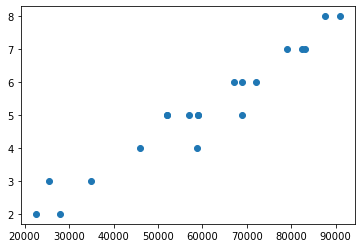

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

df = pd.read_csv(r'C:\Users\Aashir\Downloads\carprices (1).csv')

plt.scatter(df['Mileage'], df['Age(yrs)'])



In [47]:
X = df[['Mileage','Age(yrs)']]
Y = df[['Sell Price($)']]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(y_train)

    Sell Price($)
2           26100
14          19400
4           31500
17          19700
7           19300
1           34000
13          27500
0           18000
19          28200
18          12800
9           22000
15          35000
8           12000
12          26000
11          19500
5           26750


In [49]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

In [52]:
y_pred = model.predict(x_test)